# Tema 3: Word Embeddings

## Ejercicio 1: Modelos preentrenados

In [1]:
import gensim.downloader as api
from gensim.models.fasttext import load_facebook_model
from pathlib import Path


# Configurar rutas
PATH_MODELS = Path.cwd().parent / 'models'

In [2]:
w2v = api.load("word2vec-google-news-300")
similar_word = w2v.most_similar(positive=['woman', 'king'], negative=['man'])
similar_word

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

In [3]:
glove = api.load("glove-wiki-gigaword-300")
similar_word = glove.most_similar(positive=['woman', 'king'], negative=['man'])
similar_word

[('queen', 0.6713276505470276),
 ('princess', 0.5432624220848083),
 ('throne', 0.5386104583740234),
 ('monarch', 0.5347574949264526),
 ('daughter', 0.49802514910697937),
 ('mother', 0.49564430117607117),
 ('elizabeth', 0.4832652509212494),
 ('kingdom', 0.47747090458869934),
 ('prince', 0.4668239951133728),
 ('wife', 0.46473273634910583)]

In [4]:
ft = load_facebook_model(str(PATH_MODELS / 'wiki.simple.bin')).wv
similar_word = ft.most_similar(positive=['woman', 'king'], negative=['man'])
similar_word

[('queen', 0.5129119753837585),
 ('kingship', 0.48364701867103577),
 ('kingz', 0.4800509512424469),
 ('kings', 0.4712149500846863),
 ('adulyadej', 0.46895354986190796),
 ('regnant', 0.4502074122428894),
 ('kingkong', 0.44608789682388306),
 ('womans', 0.44559499621391296),
 ('ælfthryth', 0.44271937012672424),
 ('noblewoman', 0.4404858350753784)]

## Ejercicio 2: Obtener embeddings

In [5]:
import numpy as np

In [6]:
words = ['apple', 'orange', 'banana']

mat_w2v = np.array([w2v[word] for word in words])
mat_glove = np.array([glove[word] for word in words])
mat_ft = np.array([ft[word] for word in words])

print(mat_w2v.shape, mat_w2v)
print()
print(mat_glove.shape, mat_glove)
print()
print(mat_ft.shape, mat_ft)

(3, 300) [[-6.44531250e-02 -1.60156250e-01 -1.20849609e-02  1.34765625e-01
  -2.29492188e-01  1.62109375e-01  3.04687500e-01 -1.79687500e-01
  -1.21093750e-01  2.53906250e-01 -1.42822266e-02 -6.39648438e-02
  -8.05664062e-02 -5.68847656e-02 -1.96289062e-01  2.89062500e-01
  -5.15136719e-02  1.42578125e-01 -1.04980469e-01 -4.73632812e-02
  -3.47656250e-01  3.57421875e-01  2.65625000e-01  1.88446045e-03
  -1.58691406e-02  1.95312500e-03 -3.55468750e-01  2.21679688e-01
   5.76171875e-02  1.59179688e-01  8.69140625e-02 -2.67333984e-02
  -4.78515625e-02  2.39257812e-01 -5.98144531e-02  3.78417969e-02
   1.73828125e-01 -4.17968750e-01  2.89062500e-01  3.26171875e-01
   2.42919922e-02 -1.64794922e-02 -6.49414062e-02 -8.88671875e-02
   7.66601562e-02 -1.51367188e-01  5.24902344e-02 -4.19921875e-02
  -5.41992188e-02  1.08337402e-03 -2.01171875e-01  1.23046875e-01
   9.22851562e-02  1.04492188e-01 -4.08935547e-03 -4.19921875e-02
   1.40991211e-02 -2.11181641e-02 -1.34765625e-01 -2.43164062e-01
 

In [7]:
w2v['orangge']

In [8]:
glove['orangge']

In [9]:
ft['orangge']

array([ 0.0848861 , -0.24361728, -0.15665574, -0.27772892,  0.12597975,
        0.34166035, -0.53036046,  0.07849488,  0.06062262,  0.03702094,
        0.16619357,  0.10360388,  0.2446159 ,  0.10989391, -0.01875357,
       -0.02365377,  0.06570328,  0.07611778, -0.07399978,  0.21350299,
        0.4389209 ,  0.31556138,  0.13780461, -0.29011443, -0.05177888,
       -0.3906618 ,  0.37533027, -0.35044304, -0.20348176,  0.07665174,
       -0.06626198,  0.34911892, -0.18718702,  0.02643492,  0.1676504 ,
       -0.1799791 , -0.299075  , -0.02373791,  0.02268481,  0.258172  ,
        0.34293818, -0.13190585,  0.33591038, -0.15249175,  0.34161243,
       -0.14774841,  0.05844269,  0.35795975,  0.33847216, -0.05780444,
       -0.05892941,  0.35299194, -0.25106996, -0.17131838, -0.34667447,
       -0.06260791,  0.62043476,  0.09112868, -0.20632559, -0.25576127,
       -0.11012209,  0.43092152,  0.3778122 ,  0.06350358, -0.21306604,
        0.3386955 , -0.20319079,  0.04267971, -0.08564284,  0.20

## Ejercicio 3: Visualizar embeddings

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [11]:
def visualize_words(words, model):
    word_vectors = np.array([model[word] for word in words])

    pca = PCA(n_components=2)
    word_vectors_2d = pca.fit_transform(word_vectors)

    plt.figure(figsize=(8, 6))
    for word, coord in zip(words, word_vectors_2d):
        plt.scatter(coord[0], coord[1], marker='o', label=word)
        plt.text(coord[0], coord[1], word, fontsize=12)

    plt.grid()
    plt.show()

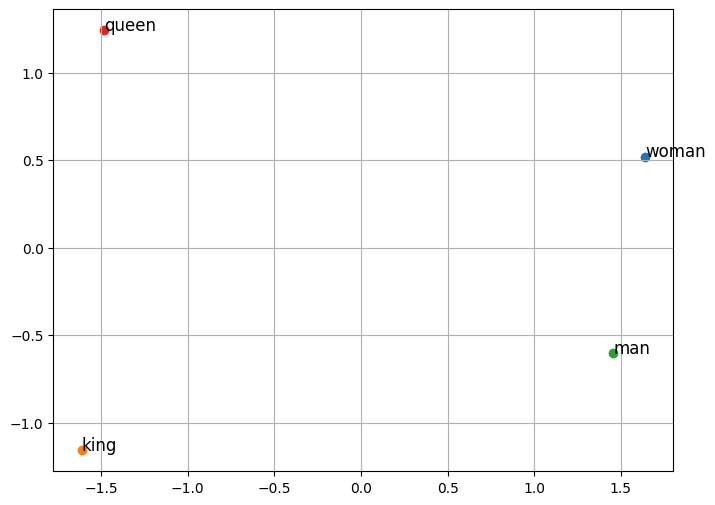

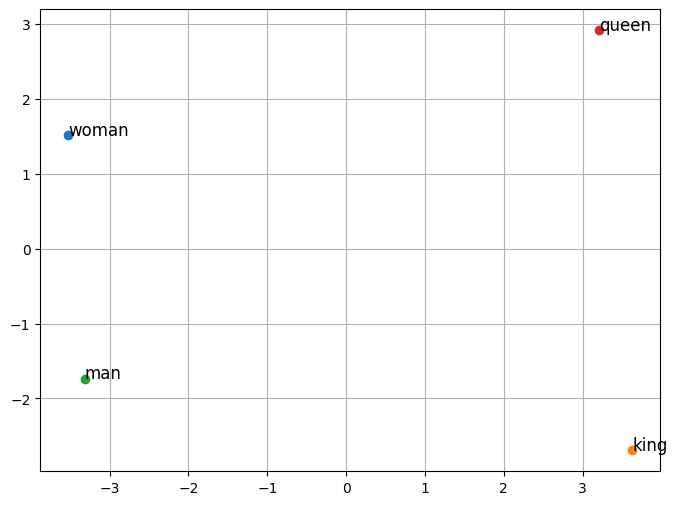

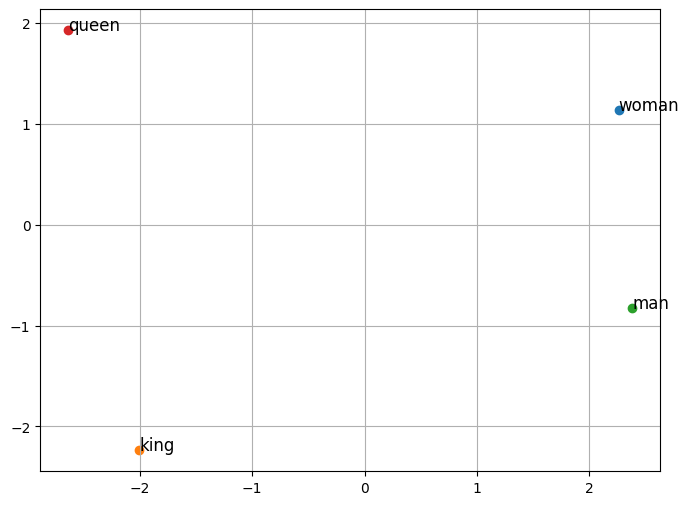

In [12]:
visualize_words(["woman", "king", "man", "queen"], w2v)
visualize_words(["woman", "king", "man", "queen"], glove)
visualize_words(["woman", "king", "man", "queen"], ft)

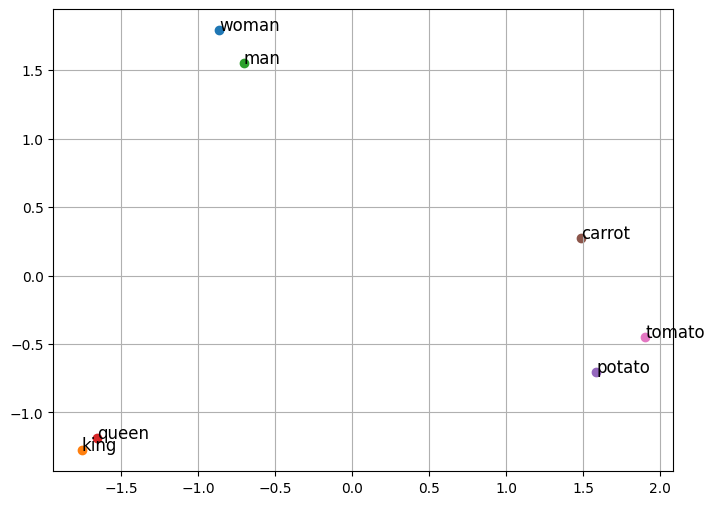

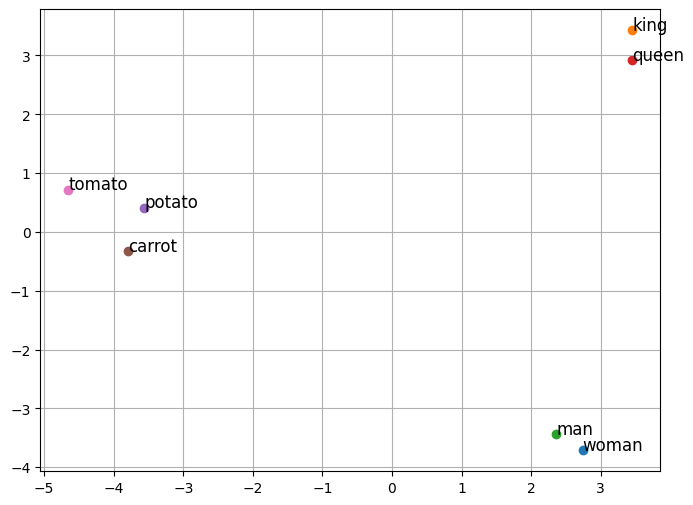

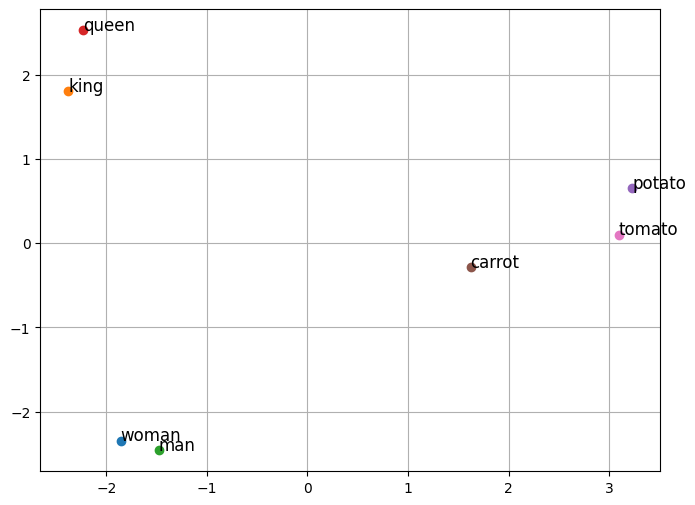

In [13]:
visualize_words(["woman", "king", "man", "queen", "potato", "carrot", "tomato"], w2v)
visualize_words(["woman", "king", "man", "queen", "potato", "carrot", "tomato"], glove)
visualize_words(["woman", "king", "man", "queen", "potato", "carrot", "tomato"], ft)

## Ejercicio 4: Similitud de oraciones

In [14]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


nlp = spacy.load("en_core_web_sm")

/home/natalia/Desktop/pln-gicd-codigos/03-representacion-texto/.venv/lib/python3.12/site-packages/torch/cuda/__init__.py:827: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [15]:
def get_tokens(sentence):
    return [token.text.lower() for token in nlp(sentence) if not token.is_stop and not token.is_punct]


def get_mean_vector(sent_tokens, model):
    vectors = [model[token] for token in sent_tokens]
    return np.mean(vectors, axis=0).reshape(1, -1)


def get_max_vector(sent_tokens, model):
    vectors = [model[token] for token in sent_tokens]
    return np.max(vectors, axis=0).reshape(1, -1)


def get_weighted_mean_vector(sent_tokens, model, weights):
    vectors = [model[token] for token in sent_tokens]
    return np.average(vectors, axis=0, weights=weights).reshape(1, -1)

In [16]:
query = "Dogs are domestic animals."

sentences = [
    "Dogs are pets.",
    "This is a dog.",
    "They are free today."
]

tfidf = TfidfVectorizer(tokenizer=get_tokens, token_pattern=None)
tfidf.fit([query] + sentences)
idfs = dict(zip(tfidf.get_feature_names_out(), tfidf.idf_))
idfs

{'animals': np.float64(1.916290731874155),
 'dog': np.float64(1.916290731874155),
 'dogs': np.float64(1.5108256237659907),
 'domestic': np.float64(1.916290731874155),
 'free': np.float64(1.916290731874155),
 'pets': np.float64(1.916290731874155),
 'today': np.float64(1.916290731874155)}

In [17]:
query_tokens = get_tokens(query)
idf_weights = [idfs[token] for token in query_tokens]

query_mean_vector = get_mean_vector(query_tokens, w2v)
query_max_vector = get_max_vector(query_tokens, w2v)
query_weighted_mean_vector = get_weighted_mean_vector(query_tokens, w2v, idf_weights)


for sent in sentences:
    sent_tokens = get_tokens(sent)
    idf_weights = [idfs[token] for token in sent_tokens]

    sent_mean_vector = get_mean_vector(sent_tokens, w2v)
    sent_max_vector = get_max_vector(sent_tokens, w2v)
    sent_weighted_mean_vector = get_weighted_mean_vector(sent_tokens, w2v, idf_weights)

    print('-------------------------------------------------------------------')
    print(f'Query: "{query}" - Sentence: "{sent}"')
    print('-------------------------------------------------------------------')
    print('Mean:', cosine_similarity(query_mean_vector, sent_mean_vector))
    print('Max:', cosine_similarity(query_max_vector, sent_max_vector))
    print('Weighted mean:', cosine_similarity(query_weighted_mean_vector, sent_weighted_mean_vector))
    print()

-------------------------------------------------------------------
Query: "Dogs are domestic animals." - Sentence: "Dogs are pets."
-------------------------------------------------------------------
Mean: [[0.8580245]]
Max: [[0.68535876]]
Weighted mean: [[0.82931872]]

-------------------------------------------------------------------
Query: "Dogs are domestic animals." - Sentence: "This is a dog."
-------------------------------------------------------------------
Mean: [[0.72454756]]
Max: [[0.44368753]]
Weighted mean: [[0.69642303]]

-------------------------------------------------------------------
Query: "Dogs are domestic animals." - Sentence: "They are free today."
-------------------------------------------------------------------
Mean: [[0.0956925]]
Max: [[0.3348693]]
Weighted mean: [[0.09542403]]



In [18]:
query_tokens = get_tokens(query)
idf_weights = [idfs[token] for token in query_tokens]

query_mean_vector = get_mean_vector(query_tokens, glove)
query_max_vector = get_max_vector(query_tokens, glove)
query_weighted_mean_vector = get_weighted_mean_vector(query_tokens, glove, idf_weights)


for sent in sentences:
    sent_tokens = get_tokens(sent)
    idf_weights = [idfs[token] for token in sent_tokens]

    sent_mean_vector = get_mean_vector(sent_tokens, glove)
    sent_max_vector = get_max_vector(sent_tokens, glove)
    sent_weighted_mean_vector = get_weighted_mean_vector(sent_tokens, glove, idf_weights)

    print('-------------------------------------------------------------------')
    print(f'Query: "{query}" - Sentence: "{sent}"')
    print('-------------------------------------------------------------------')
    print('Mean:', cosine_similarity(query_mean_vector, sent_mean_vector))
    print('Max:', cosine_similarity(query_max_vector, sent_max_vector))
    print('Weighted mean:', cosine_similarity(query_weighted_mean_vector, sent_weighted_mean_vector))
    print()

-------------------------------------------------------------------
Query: "Dogs are domestic animals." - Sentence: "Dogs are pets."
-------------------------------------------------------------------
Mean: [[0.8194822]]
Max: [[0.7480391]]
Weighted mean: [[0.78438058]]

-------------------------------------------------------------------
Query: "Dogs are domestic animals." - Sentence: "This is a dog."
-------------------------------------------------------------------
Mean: [[0.6290905]]
Max: [[0.4115317]]
Weighted mean: [[0.60017468]]

-------------------------------------------------------------------
Query: "Dogs are domestic animals." - Sentence: "They are free today."
-------------------------------------------------------------------
Mean: [[0.35592297]]
Max: [[0.39334333]]
Weighted mean: [[0.36110057]]



In [19]:
query_tokens = get_tokens(query)
idf_weights = [idfs[token] for token in query_tokens]

query_mean_vector = get_mean_vector(query_tokens, ft)
query_max_vector = get_max_vector(query_tokens, ft)
query_weighted_mean_vector = get_weighted_mean_vector(query_tokens, ft, idf_weights)


for sent in sentences:
    sent_tokens = get_tokens(sent)
    idf_weights = [idfs[token] for token in sent_tokens]

    sent_mean_vector = get_mean_vector(sent_tokens, ft)
    sent_max_vector = get_max_vector(sent_tokens, ft)
    sent_weighted_mean_vector = get_weighted_mean_vector(sent_tokens, ft, idf_weights)

    print('-------------------------------------------------------------------')
    print(f'Query: "{query}" - Sentence: "{sent}"')
    print('-------------------------------------------------------------------')
    print('Mean:', cosine_similarity(query_mean_vector, sent_mean_vector))
    print('Max:', cosine_similarity(query_max_vector, sent_max_vector))
    print('Weighted mean:', cosine_similarity(query_weighted_mean_vector, sent_weighted_mean_vector))
    print()

-------------------------------------------------------------------
Query: "Dogs are domestic animals." - Sentence: "Dogs are pets."
-------------------------------------------------------------------
Mean: [[0.79981136]]
Max: [[0.7353516]]
Weighted mean: [[0.75949642]]

-------------------------------------------------------------------
Query: "Dogs are domestic animals." - Sentence: "This is a dog."
-------------------------------------------------------------------
Mean: [[0.62252533]]
Max: [[0.3605178]]
Weighted mean: [[0.6000439]]

-------------------------------------------------------------------
Query: "Dogs are domestic animals." - Sentence: "They are free today."
-------------------------------------------------------------------
Mean: [[0.24452384]]
Max: [[0.39579585]]
Weighted mean: [[0.24933552]]



## Ejercicio 5: BERT

In [20]:
import torch
from transformers import BertModel, BertTokenizer


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [21]:
def get_bert_embeddings(text):
    tokens = tokenizer(text, padding=True, truncation=True, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**tokens)
    # obtener embeddings de la ultima capa (last_hidden_state) y
    # eliminar [CLS] (primer token) y [SEP] (ultimo token) para frases simples
    return outputs.last_hidden_state.numpy()[:, 1:-1, :]


def get_bert_mean_vector(text):
    embeddings = get_bert_embeddings(text)
    return np.mean(embeddings[0], axis=0)


def get_bert_max_vector(text):
    embeddings = get_bert_embeddings(text)
    return np.max(embeddings[0], axis=0)

In [22]:
query_mean_vector = get_bert_mean_vector(query)
query_max_vector = get_bert_max_vector(query)

for sent in sentences:
    sent_mean_vector = get_bert_mean_vector(sent)
    sent_max_vector = get_bert_max_vector(sent)

    print('-------------------------------------------------------------------')
    print(f'Query: "{query}" - Sentence: "{sent}"')
    print('-------------------------------------------------------------------')
    print("Mean:", cosine_similarity([query_mean_vector], [sent_mean_vector]))
    print("Max:", cosine_similarity([query_max_vector], [sent_max_vector]))
    print()

-------------------------------------------------------------------
Query: "Dogs are domestic animals." - Sentence: "Dogs are pets."
-------------------------------------------------------------------
Mean: [[0.8171347]]
Max: [[0.7983242]]

-------------------------------------------------------------------
Query: "Dogs are domestic animals." - Sentence: "This is a dog."
-------------------------------------------------------------------
Mean: [[0.69774485]]
Max: [[0.81108034]]

-------------------------------------------------------------------
Query: "Dogs are domestic animals." - Sentence: "They are free today."
-------------------------------------------------------------------
Mean: [[0.57056797]]
Max: [[0.75801915]]

